# **1. Bayesian Regression**

In [ ]:
!pip install pyro-ppl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 5.6 MB/s eta 0:00:00


### Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
austin_housing = pd.read_csv('https://raw.githubusercontent.com/LinUTexas/ML_Fall23/main/austinHousingData_ML.csv')

In [ ]:
print (f'Number of data points: {len(austin_housing)}')
austin_housing.head()


Number of data points: 15171


,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,yearBuilt,Price,latest_saledate,SizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories
0,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,1,1,...,2012,305000,2019-09-02,6011,2601,1.267,2.667,3.0,4,2
1,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,1,1,1,...,2013,295000,2020-10-13,6185,1768,1.400,2.667,2.0,4,1
2,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,1,0,...,2018,256125,2019-07-31,7840,1478,1.200,3.000,2.0,3,1
3,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,1,1,...,2013,240000,2018-08-08,6098,1678,1.400,2.667,2.0,3,1
4,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,1,0,...,2002,239900,2018-10-31,6708,2132,1.133,4.000,3.0,3,2


### Analysis of correlations between parameters

We can observe that there is high correlation between price and the living area in square feet and also with the number of bathroom. We will use those features for the bayesian regression.

In [ ]:
correlations=austin_housing.corr()

<ipython-input-195-adf8b4a0d435>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=austin_housing.corr()


<ipython-input-196-999bbb4051ac>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(austin_housing.corr(), annot=True, cmap= 'YlGnBu')


<Axes: >

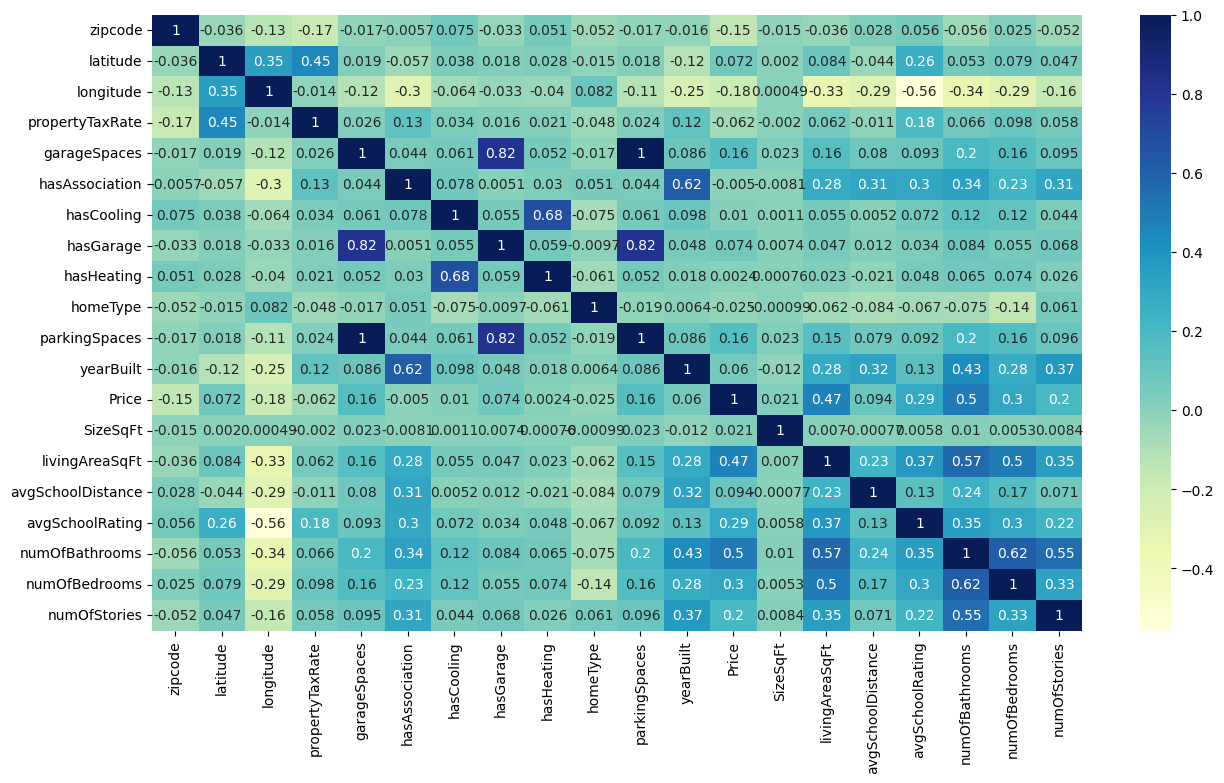

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(austin_housing.corr(), annot=True, cmap= 'YlGnBu')

### **Regression Living Area - Price**

#### Analysis of the prior distributions

We analyzed the prior distributions and then we compared it with the posterior distributions.

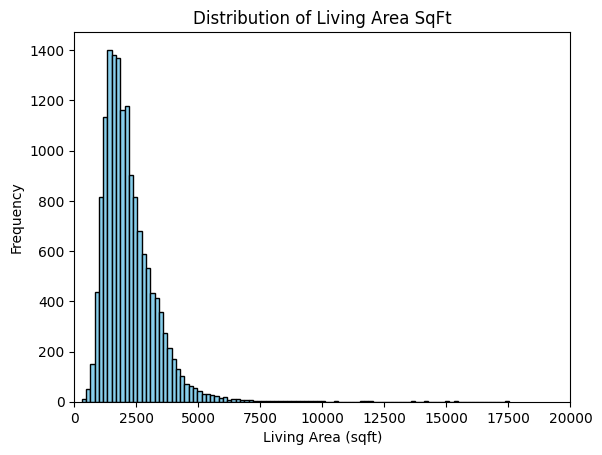

In [ ]:
limited_data = austin_housing[austin_housing['livingAreaSqFt'] <= 20000]

# Plotting the histogram with limited x-axis range
plt.hist(limited_data['livingAreaSqFt'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Living Area SqFt')

# Set x-axis limit to 20,000
plt.xlim(0, 20000)

plt.show()

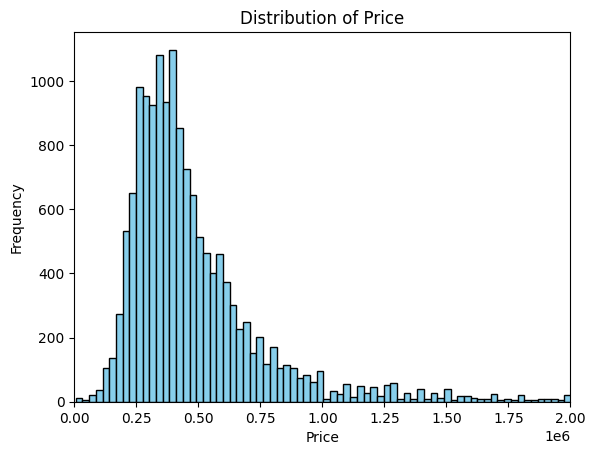

In [ ]:
plt.hist(limited_data['Price'], bins=500, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Set x-axis limit to 20,000
plt.xlim(0, 2000000)

plt.show()

In [ ]:
df_sqf= austin_housing[['livingAreaSqFt','Price']]
df_sqf.head()


,livingAreaSqFt,Price
0,2601,305000
1,1768,295000
2,1478,256125
3,1678,240000
4,2132,239900


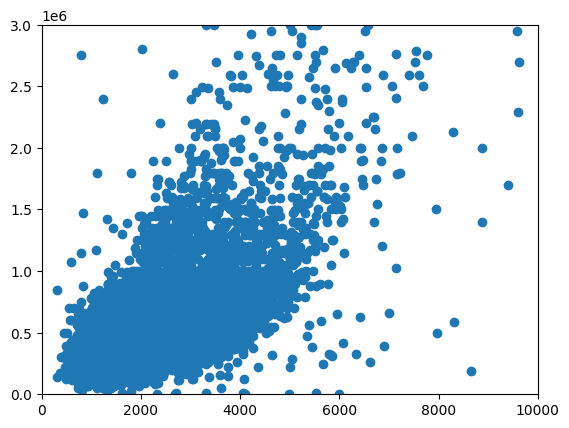

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df_sqf['livingAreaSqFt'],df_sqf['Price'])

plt.xlim(0,10000)
plt.ylim(0,3000000)

# Display the plot
plt.show()

For the regression, we use a smaller number of points than we had in the data set. We try different numbers of points until we got results in the Bayesian regression that do not change significantly from one to the other.

In [ ]:
df_sqf['livingAreaSqFt'].max()

109292

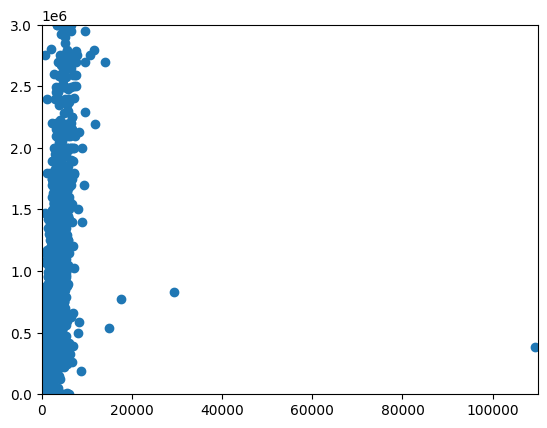

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df_sqf['livingAreaSqFt'],df_sqf['Price'])

plt.xlim(0,110000)
plt.ylim(0,3000000)

# Display the plot
plt.show()

In [ ]:
df_sqf = df_sqf[df_sqf['livingAreaSqFt'] <= 20000]

In [ ]:
X = df_sqf.copy(deep=True)
y = df_sqf['Price']


In [ ]:
X, X_drop, y, y_drop = train_test_split(X, y, test_size=0.95, random_state=0)
len(y)

758

In [ ]:
len(X)

758

In [ ]:
X_data= X['livingAreaSqFt']
y_data= y
X_data.head()

6912    2262
8431    2435
3109    1719
3667    1627
8865    2110
Name: livingAreaSqFt, dtype: int64

In [ ]:
y_data.head()

6912    415000
8431    340000
3109    340000
3667    479000
8865    375000
Name: Price, dtype: int64

In [ ]:
len(X_data)

758

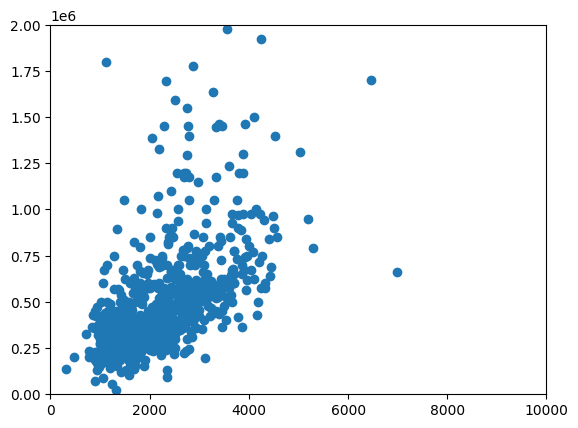

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(X_data,y_data)

plt.xlim(0,10000)
plt.ylim(0,2000000)

# Display the plot
plt.show()

### **Regression Model**

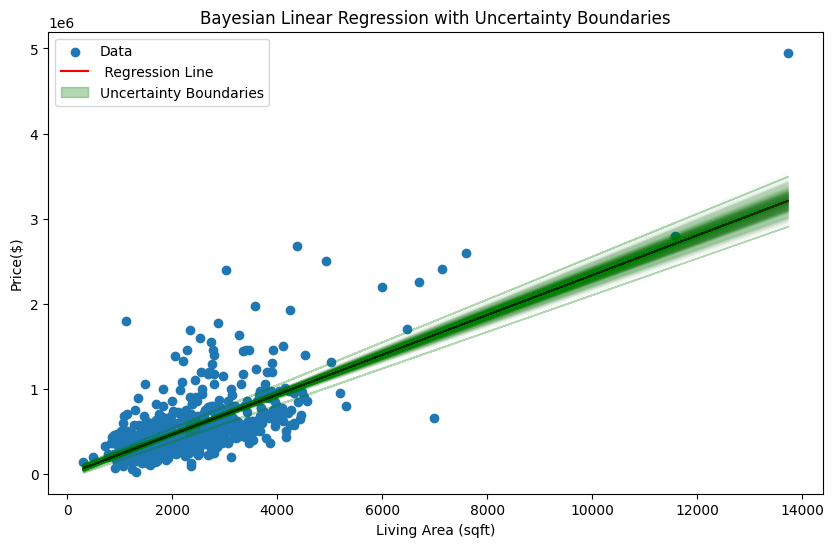

Posterior estimate for alpha: -6050.006616344873
Posterior estimate for beta: 234.01862669483515
Posterior estimate for sigma: 268530.86538680585


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Set of points
x = np.array(X_data.values)
y = np.array(y_data.values)

# Create the design matrix by adding a column of ones for intercept
X = np.vstack((np.ones_like(x), x)).T

# Define the likelihood function for linear regression
def linear_likelihood(theta, X, y):
    alpha = theta[0]
    beta = theta[1]
    sigma = theta[2]

    y_pred = X.dot([alpha, beta])
    log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + ((y - y_pred) / sigma) ** 2)
    return -log_likelihood

# Initial values for alpha, beta, and sigma
initial_values = [0, 0, 1]

# Use optimization to find posterior estimates
result = minimize(linear_likelihood, initial_values, args=(X, y), method='L-BFGS-B')

# Extract posterior parameters estimates
alpha_map, beta_map, sigma_map = result.x

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')

# Plotting the regression line
plt.plot(x, alpha_map + beta_map * x, color='red', label=' Regression Line')

# Generate samples from the posterior distribution
num_samples = 1000
posterior_samples = np.random.multivariate_normal(
    [alpha_map, beta_map],
    sigma_map**2 * np.linalg.inv(X.T @ X),
    size=num_samples
)

# Calculate y values for each sample
for sample in posterior_samples:
    plt.plot(x, sample[0] + sample[1] * x, color='green', alpha=0.01)

# Calculate and plot uncertainty boundaries
alpha_samples = posterior_samples[:, 0]
beta_samples = posterior_samples[:, 1]

alpha_credible_interval = np.percentile(alpha_samples, [2.5, 97.5])
beta_credible_interval = np.percentile(beta_samples, [2.5, 97.5])

y_upper = alpha_credible_interval[1] + beta_credible_interval[1] * x
y_lower = alpha_credible_interval[0] + beta_credible_interval[0] * x

plt.fill_between(x, y_lower, y_upper, color='green', alpha=0.3, label='Uncertainty Boundaries')

plt.xlabel('Living Area (sqft)')
plt.ylabel('Price($)')
plt.title('Bayesian Linear Regression with Uncertainty Boundaries')
plt.legend()
plt.show()

# Display posterior estimates
print("Posterior estimate for alpha:", alpha_map)
print("Posterior estimate for beta:", beta_map)
print("Posterior estimate for sigma:", sigma_map)

**Note:**

alpa: bias of the regresion line

beta: slope of the regresion line.

Sigma: standar deviation

Note that the parameters of the posterior distrbution are random variables. We analyzed their probability density functions.

Standard deviation of alpha: 21842.983517146604
Standard deviation of beta: 8.71127396675828
Standard deviation of sigma: 8.71127396675828


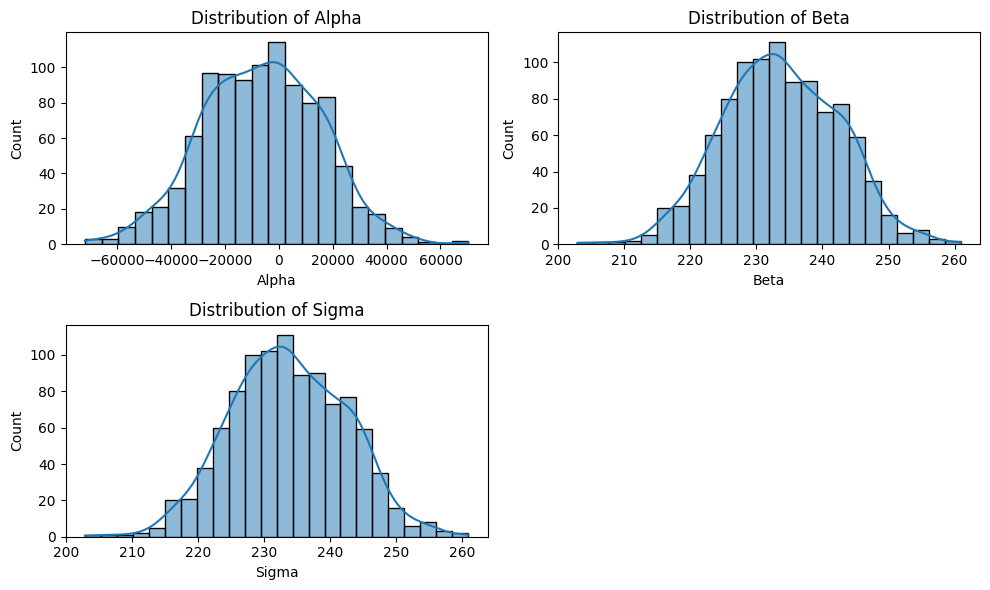

In [ ]:
import seaborn as sns

# Plotting the distributions of alpha, beta, and sigma
plt.figure(figsize=(10, 6))

# Plotting alpha distribution
plt.subplot(2, 2, 1)
sns.histplot(alpha_samples, kde=True)
plt.xlabel('Alpha')
plt.title('Distribution of Alpha')

# Plotting beta distribution
plt.subplot(2, 2, 2)
sns.histplot(beta_samples, kde=True)
plt.xlabel('Beta')
plt.title('Distribution of Beta')

# Plotting sigma distribution
plt.subplot(2, 2, 3)
sigma_samples = posterior_samples[:, 1]  # Extract sigma samples from posterior samples
sns.histplot(sigma_samples, kde=True)
plt.xlabel('Sigma')
plt.title('Distribution of Sigma')

# Calculate and display standard deviations
alpha_std = np.std(alpha_samples)
beta_std = np.std(beta_samples)
sigma_std = np.std(sigma_samples)

print("Standard deviation of alpha:", alpha_std)
print("Standard deviation of beta:", beta_std)
print("Standard deviation of sigma:", sigma_std)

plt.tight_layout()
plt.show()


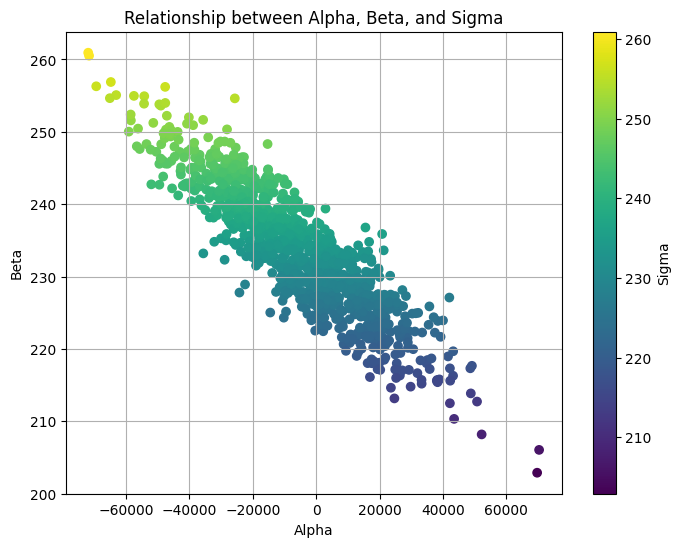

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot with alpha and beta values, colored by sigma values
sc = plt.scatter(alpha_samples, beta_samples, c=sigma_samples, cmap='viridis')
plt.colorbar(sc, label='Sigma')  # Add a colorbar to show the range of sigma values

# Set labels for axes
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Relationship between Alpha, Beta, and Sigma')

plt.grid(True)
plt.show()


Note that we used only a small number of data point for this regresion, but we used the posterior values to predict the Price values of all the point and compare them with the real data.

In [ ]:
pred= pd.DataFrame()
pred ['longitude']= austin_housing['longitude']
pred['latitude']= austin_housing['latitude']
pred['Price']= alpha_map + beta_map * austin_housing['livingAreaSqFt']

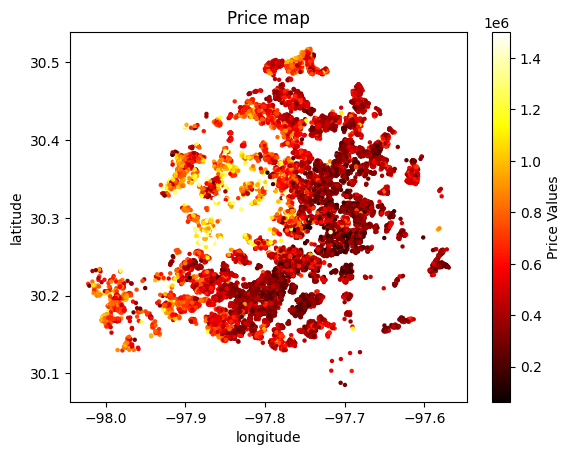

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(pred['longitude'], pred['latitude'], c=pred['Price'], cmap='hot', marker='o', s=10 , edgecolors='none', vmax=1500000)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

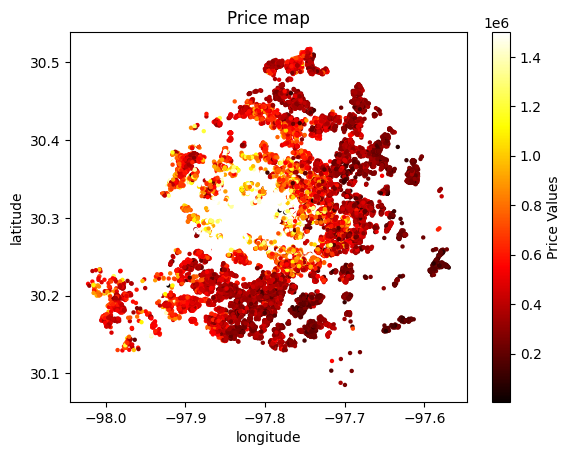

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(austin_housing['longitude'], austin_housing['latitude'], c=austin_housing['Price'], cmap='hot', marker='o', s=10 , edgecolors='none', vmax=1500000)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

Average error: 26.684328019483846 %


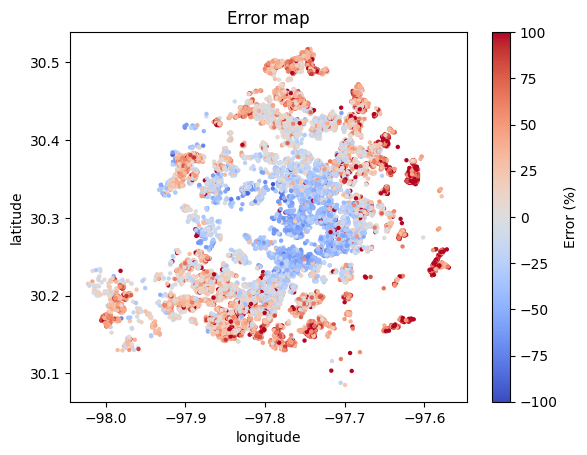

In [ ]:
import pandas as pd

dif= pd.DataFrame()
dif['longitude']= austin_housing['longitude']
dif['latitude']= austin_housing['latitude']
dif['difference']= 100*(pred['Price'] - austin_housing['Price'])/austin_housing['Price']

print(f"Average error: {dif['difference'].mean()} %")

# Plotting the scatter plot
plt.scatter(dif['longitude'], dif['latitude'], c=dif['difference'], cmap='coolwarm', marker='o', s=10 , edgecolors='none', vmin=-100 , vmax=100)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Error (%)')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Error map')

# Display the plot
plt.show()


We plot the distributions of the data points and the predicted points for comparison

(0.0, 2000000.0)

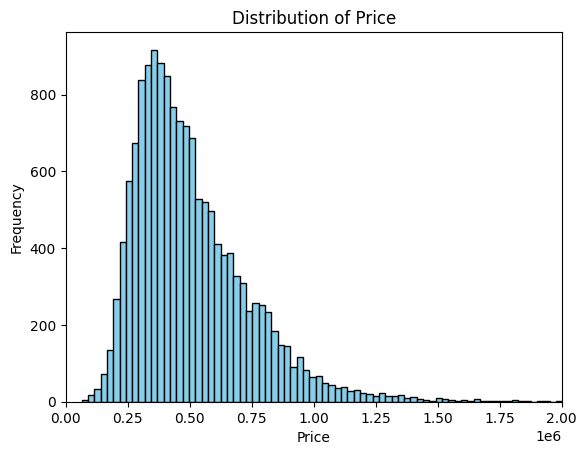

In [ ]:
posterior_distrib = pred['Price']

plt.hist(posterior_distrib, bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Set x-axis limit to 20,000
plt.xlim(0, 2000000)


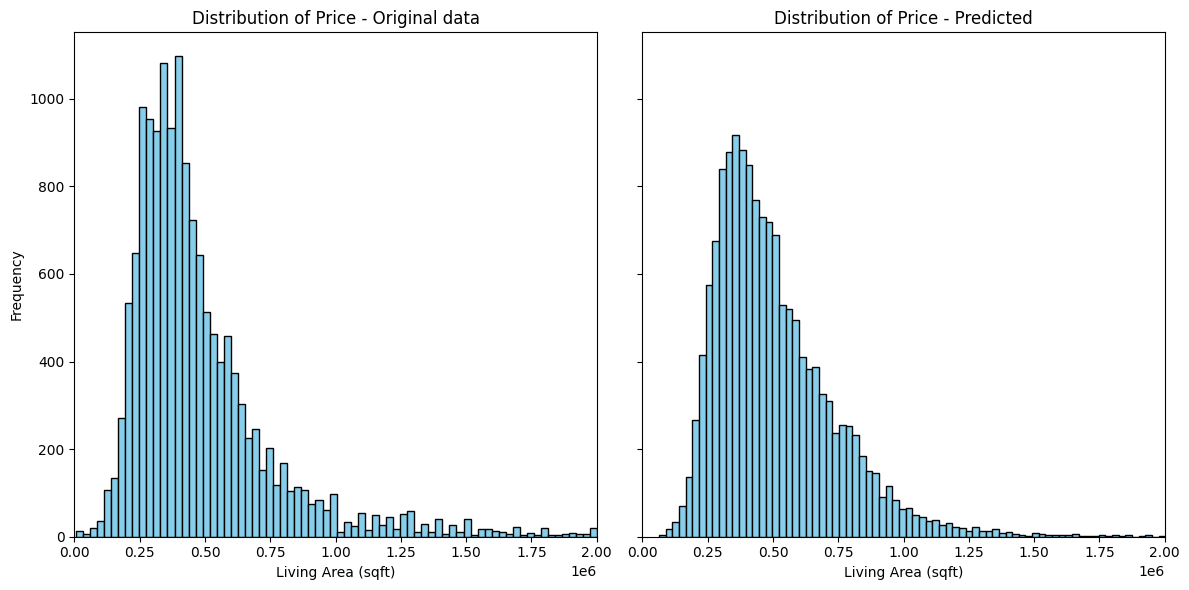

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting the second histogram
axs[0].hist(limited_data['Price'], bins=500, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Living Area (sqft)')
axs[0].set_title('Distribution of Price - Original data')
axs[0].set_xlim(0, 2000000)  # Set x-axis limit

# Plotting the first histogram
axs[1].hist(posterior_distrib, bins=1000, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Living Area (sqft)')
axs[0].set_ylabel('Frequency')
axs[1].set_title('Distribution of Price - Predicted')
axs[1].set_xlim(0, 2000000)  # Set x-axis limit



plt.tight_layout()
plt.show()

We can see a very good alignement in the distribution of original and predicted data.

### Similar analysis for number of bathrooms

In [ ]:
df_nbr= austin_housing[['numOfBathrooms','Price']]
df_nbr.head()

,numOfBathrooms,Price
0,3.0,305000
1,2.0,295000
2,2.0,256125
3,2.0,240000
4,3.0,239900


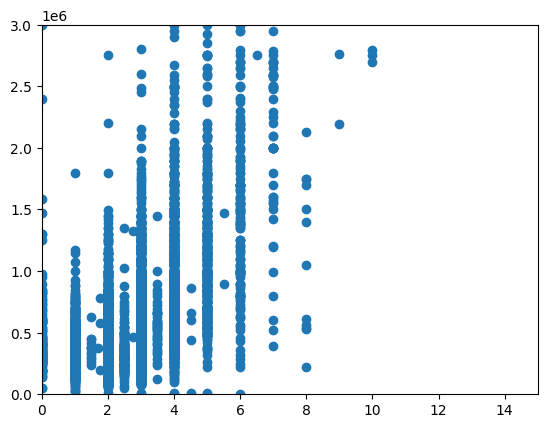

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df_nbr['numOfBathrooms'],df_nbr['Price'])

plt.xlim(0,15)
plt.ylim(0,3000000)

# Display the plot
plt.show()

In [ ]:
df_nbr = df_nbr[df_nbr['numOfBathrooms'] <= 15]

In [ ]:
X2 = df_nbr.copy(deep=True)
y2 = df_nbr['Price']

In [ ]:
X_data2= X2['numOfBathrooms']
y_data2= y2
X_data2.head()

0    3.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: numOfBathrooms, dtype: float64

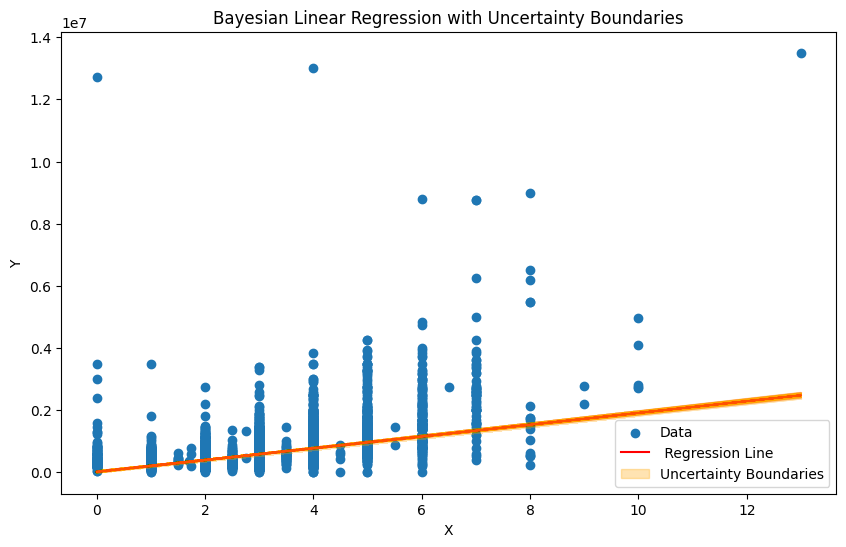

Posterior estimate for alpha: 17695.2309397185
Posterior estimate for beta: 189453.61163567964
Posterior estimate for sigma: 393083.4271963108


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Set of points
x = np.array(X_data2.values)
y = np.array(y_data2.values)

# Create the design matrix by adding a column of ones for intercept
X = np.vstack((np.ones_like(x), x)).T

# Define the likelihood function for linear regression
def linear_likelihood(theta, X, y):
    alpha = theta[0]
    beta = theta[1]
    sigma = theta[2]

    y_pred = X.dot([alpha, beta])
    log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + ((y - y_pred) / sigma) ** 2)
    return -log_likelihood

# Initial values for alpha, beta, and sigma
initial_values = [0, 0, 1]

# Use optimization to find posterior estimates
result = minimize(linear_likelihood, initial_values, args=(X, y), method='L-BFGS-B')

# Extract posterior parameters estimates
alpha_map, beta_map, sigma_map = result.x

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')

# Plotting the regression line
plt.plot(x, alpha_map + beta_map * x, color='red', label=' Regression Line')

# Generate samples from the posterior distribution
num_samples = 1000
posterior_samples = np.random.multivariate_normal(
    [alpha_map, beta_map],
    sigma_map**2 * np.linalg.inv(X.T @ X),
    size=num_samples
)

# Calculate y values for each sample
for sample in posterior_samples:
    plt.plot(x, sample[0] + sample[1] * x, color='orange', alpha=0.01)

# Calculate and plot uncertainty boundaries
alpha_samples = posterior_samples[:, 0]
beta_samples = posterior_samples[:, 1]

alpha_credible_interval = np.percentile(alpha_samples, [2.5, 97.5])
beta_credible_interval = np.percentile(beta_samples, [2.5, 97.5])

y_upper = alpha_credible_interval[1] + beta_credible_interval[1] * x
y_lower = alpha_credible_interval[0] + beta_credible_interval[0] * x

plt.fill_between(x, y_lower, y_upper, color='orange', alpha=0.3, label='Uncertainty Boundaries')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Linear Regression with Uncertainty Boundaries')
plt.legend()
plt.show()

# Display posterior estimates
print("Posterior estimate for alpha:", alpha_map)
print("Posterior estimate for beta:", beta_map)
print("Posterior estimate for sigma:", sigma_map)

Note: we are not posting in this file the prior and posterior distributions to avoid being repetitive, but we did that analysis in a backup file.

In [ ]:
pred2= pd.DataFrame()
pred2 ['longitude']= austin_housing['longitude']
pred2['latitude']= austin_housing['latitude']
pred2['Price']= alpha_map + beta_map * austin_housing['numOfBathrooms']

Average error: 35.52161076106188 %


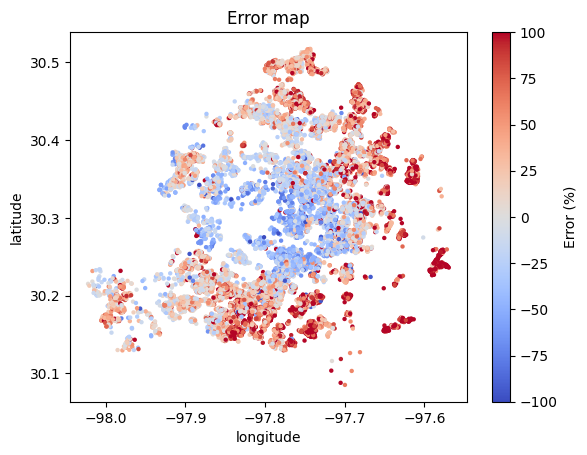

In [ ]:
import pandas as pd

dif2= pd.DataFrame()
dif2['longitude']= austin_housing['longitude']
dif2['latitude']= austin_housing['latitude']
dif2['difference']= 100*(pred2['Price'] - austin_housing['Price'])/austin_housing['Price']

print(f"Average error: {dif2['difference'].mean()} %")

# Plotting the scatter plot
plt.scatter(dif2['longitude'], dif2['latitude'], c=dif2['difference'], cmap='coolwarm', marker='o', s=10 , edgecolors='none', vmin=-100 , vmax=100)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Error (%)')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Error map')

# Display the plot
plt.show()
